## Imports

In [1]:
pip install pyccel

     |████████████████████████████████| 350 kB 7.2 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [3]:
def solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx):

    for n in range(nt):  
        for i in range (nx): un[i] = u[i] 
        for i in range(1, nx): 
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
    return 0

## Numba accelerator

In [4]:
@njit(fastmath=True)
def solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx):

    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
    return 0

## Pyccel accelerator

In [5]:
def solve_1d_nonlinearconv_pyccel(u:'float[:]', un:'float[:]', nt:'int', nx:'int', dt:'float', dx:'float'):

    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
    return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

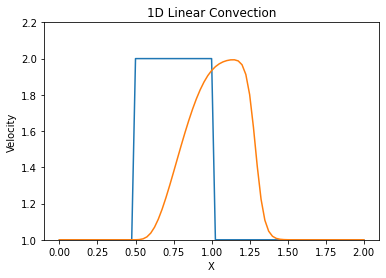

In [6]:
nx = 81  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 200    #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

## Call Funtions

### Pure function

In [7]:
%timeit solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)

100 loops, best of 5: 17 ms per loop


### Function with numba accelerator

In [8]:
%timeit solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx)

The slowest run took 85210.78 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 6.61 µs per loop


### Function with pyccel accelerator

In [9]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)

TypeError: ignored

In [ ]:
%timeit solve_1d_nonlinearconv_f90(u, un, nt, nx, dt, dx)

283 µs ± 878 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
